In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score

In [2]:
df=pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.duplicated().sum()

38

In [9]:
df=df_cleaned = df.drop_duplicates()

In [10]:
df.shape

(380, 8)

### DATA VISUALISATION & PREPROCESSING


<Axes: xlabel='Sex', ylabel='count'>

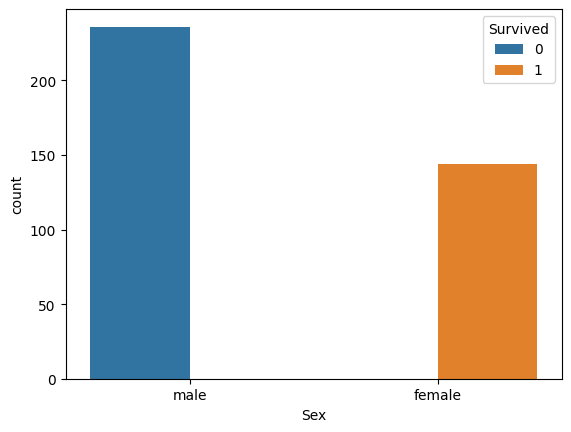

In [11]:
sns.countplot(x='Sex',data=df,hue='Survived')



<Axes: xlabel='Age', ylabel='count'>

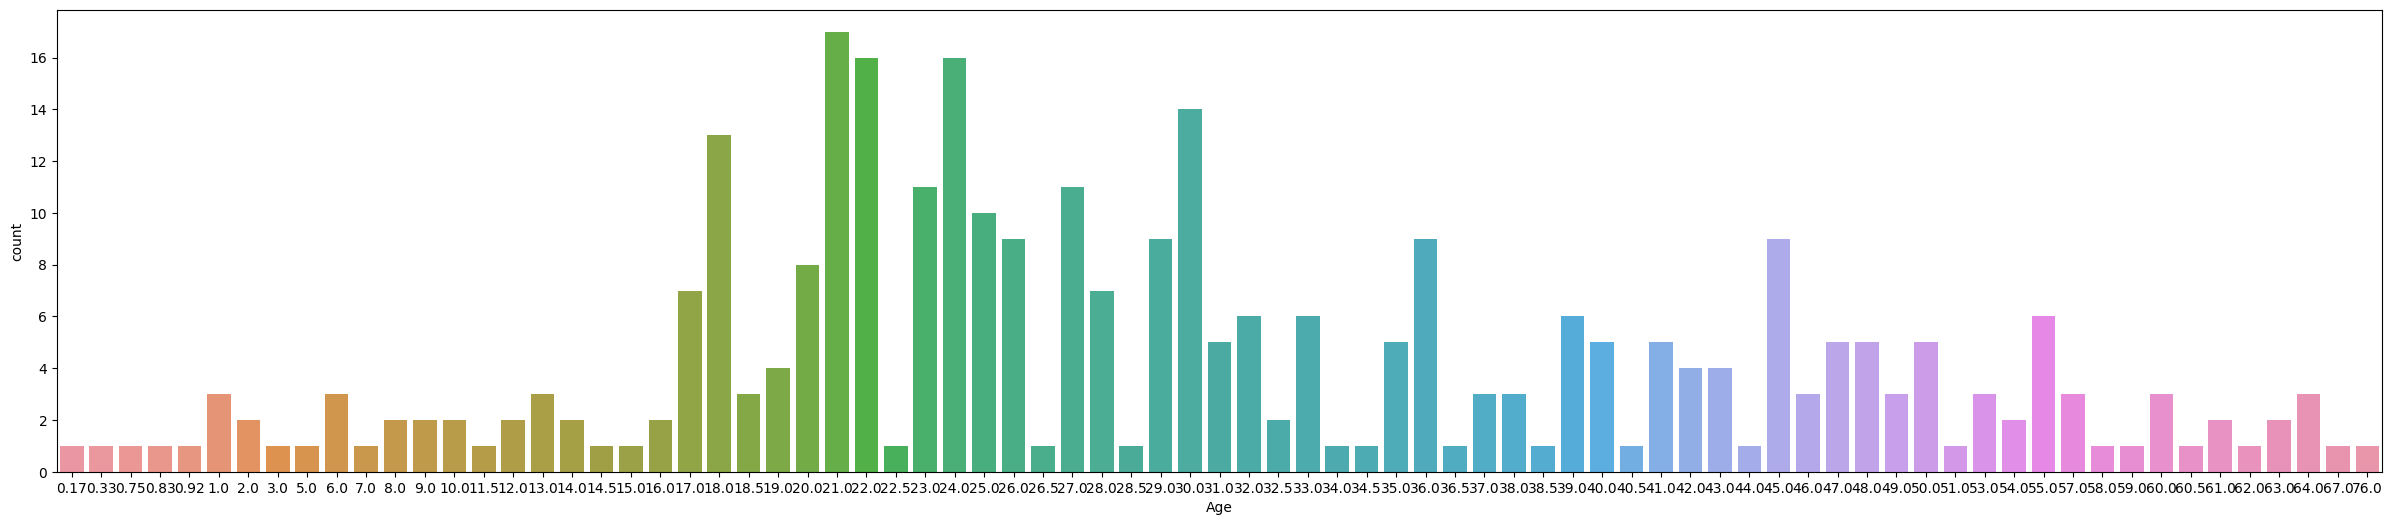

In [12]:

plt.figure(figsize=(30, 6)) 

sns.countplot(x='Age',data=df)


<Axes: xlabel='Pclass', ylabel='count'>

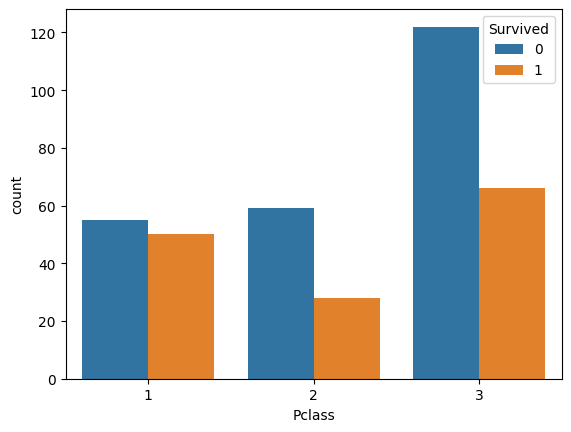

In [13]:
sns.countplot(x='Pclass',data=df,hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

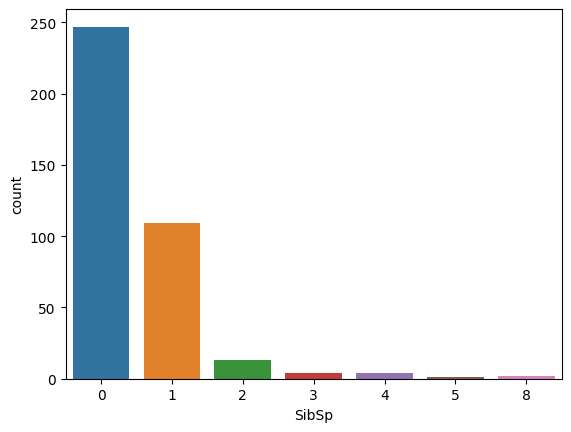

In [14]:
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='Parch', ylabel='count'>

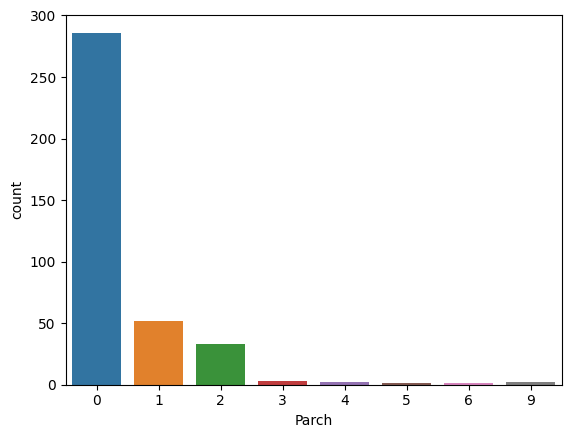

In [15]:
sns.countplot(x='Parch',data=df)

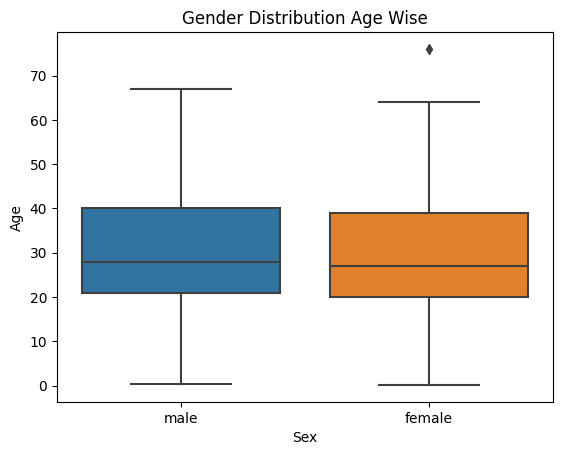

In [16]:
sns.boxplot(x=df["Sex"], y=df["Age"])
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Gender Distribution Age Wise")
plt.show()

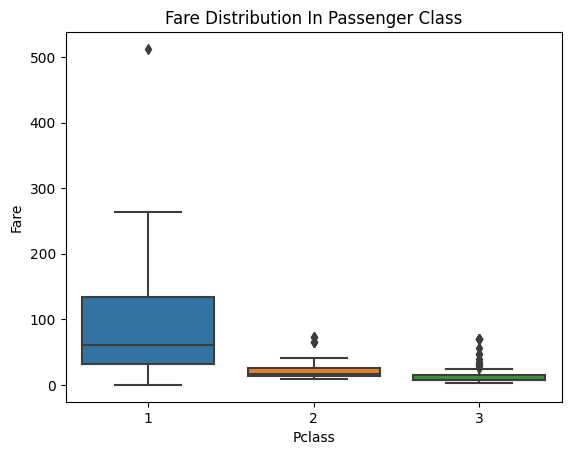

In [17]:
sns.boxplot(x=df["Pclass"], y=df["Fare"])
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Fare Distribution In Passenger Class")
plt.show()

In [18]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [19]:
mean_=df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
new_df=pd.get_dummies(data=df,columns=['Sex','Embarked'])
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,False,True,False,True,False
1,1,3,47.0,1,0,7.0000,True,False,False,False,True
2,0,2,62.0,0,0,9.6875,False,True,False,True,False
3,0,3,27.0,0,0,8.6625,False,True,False,False,True
4,1,3,22.0,1,1,12.2875,True,False,False,False,True


In [23]:
new_df.shape

(379, 11)

In [24]:
target=new_df['Survived']

In [25]:
X=new_df.drop(columns='Survived',axis=1)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=42)

## DataLoader and Model 

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

In [29]:

class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) 
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [30]:
train_loader=TitanicDataset(x_train,y_train)
train_loader=TitanicDataset(x_test,y_test)

In [31]:
batch_size=32
trainData=DataLoader(train_loader, batch_size=batch_size, shuffle=True)
testData=DataLoader(train_loader, batch_size=batch_size, shuffle=True)

In [32]:
class MYNN(nn.Module):
    def __init__(self, feature):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(feature, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 10),
            nn.ReLU(),
            nn.Linear(10, 2),
        )
    
    def forward(self, x):
        return self.model(x)

In [33]:
epochs = 25
learning_rate = 0.1

In [34]:
model=MYNN(x_train.shape[1])
losses=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [35]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
        accuracy = 100 * correct / total
        precision = precision_score(all_labels, all_preds, average='macro')
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%, Precision: {precision:.4f}")

In [36]:
import warnings
warnings.filterwarnings("ignore")


In [37]:
train_model(model,trainData,losses,optimizer,epochs)

Epoch 1/25, Loss: 0.6902, Accuracy: 59.21%, Precision: 0.2961
Epoch 2/25, Loss: 0.6633, Accuracy: 59.21%, Precision: 0.2961
Epoch 3/25, Loss: 0.6881, Accuracy: 59.21%, Precision: 0.2961
Epoch 4/25, Loss: 0.6330, Accuracy: 59.21%, Precision: 0.2961
Epoch 5/25, Loss: 0.6323, Accuracy: 59.21%, Precision: 0.2961
Epoch 6/25, Loss: 0.6238, Accuracy: 59.21%, Precision: 0.2961
Epoch 7/25, Loss: 0.5996, Accuracy: 61.84%, Precision: 0.8041
Epoch 8/25, Loss: 0.5594, Accuracy: 65.79%, Precision: 0.8169
Epoch 9/25, Loss: 0.5225, Accuracy: 77.63%, Precision: 0.8629
Epoch 10/25, Loss: 0.4828, Accuracy: 80.26%, Precision: 0.8750
Epoch 11/25, Loss: 0.4406, Accuracy: 90.79%, Precision: 0.9327
Epoch 12/25, Loss: 0.3410, Accuracy: 97.37%, Precision: 0.9787
Epoch 13/25, Loss: 0.2841, Accuracy: 97.37%, Precision: 0.9787
Epoch 14/25, Loss: 0.1997, Accuracy: 100.00%, Precision: 1.0000
Epoch 15/25, Loss: 0.1641, Accuracy: 100.00%, Precision: 1.0000
Epoch 16/25, Loss: 0.1163, Accuracy: 100.00%, Precision: 1.000

In [38]:

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    precision = precision_score(all_labels, all_preds, average='macro')
    print(f"Test Loss: {total_loss/len(test_loader):.4f}, Accuracy: {100 * correct / total:.2f}%, Precision: {precision:.4f}")


In [39]:
evaluate_model(model,testData,losses)

Test Loss: 0.0118, Accuracy: 100.00%, Precision: 1.0000
